# Component_Failure_Prediction


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/content/component_failure_prediction.csv")

In [3]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [4]:
df['Target'].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Target, dtype: float64

In [5]:
# Highly imbalance data

In [6]:
df['Failure Type'].value_counts(normalize=True)

No Failure                  0.9652
Heat Dissipation Failure    0.0112
Power Failure               0.0095
Overstrain Failure          0.0078
Tool Wear Failure           0.0045
Random Failures             0.0018
Name: Failure Type, dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
df['Type'].value_counts(normalize=True)

L    0.6000
M    0.2997
H    0.1003
Name: Type, dtype: float64

In [9]:
df.drop(['UDI','Product ID'],axis=1)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [10]:
# lets check if there is any contradictory between the two target variable

In [11]:
df_failure=df[df['Target']==1]

In [12]:
df_failure.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,Power Failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,Power Failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,Tool Wear Failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,Overstrain Failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,Overstrain Failure


In [13]:
df_failure['Failure Type'].value_counts()

Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: Failure Type, dtype: int64

In [14]:
# lets explore the oservations where there is contradictory between two dependent variable

In [15]:
df_failure[df_failure["Failure Type"]=='No Failure']

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,No Failure
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,No Failure
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,No Failure
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,No Failure
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,No Failure
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,No Failure
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,No Failure
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,No Failure
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,No Failure


In [16]:
# Lets drop the obsrvation when there is contradictory because we are not sure reason of failure

In [17]:
target_drop=df_failure[df_failure["Failure Type"]=='No Failure'].index

In [18]:
target_drop

Int64Index([1437, 2749, 4044, 4684, 5536, 5941, 6478, 8506, 9015], dtype='int64')

In [19]:
df =df.drop(target_drop,axis=0)

In [20]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [21]:
df.shape

(9991, 10)

In [22]:
df_no_failure=df[df["Target"]==0]

In [23]:
df_no_failure

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [24]:
df_no_failure["Failure Type"].value_counts()

No Failure         9643
Random Failures      18
Name: Failure Type, dtype: int64

In [25]:
df_no_failure[df_no_failure["Failure Type"]=='Random Failures']

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,Random Failures
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,Random Failures
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,Random Failures
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,Random Failures
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,Random Failures
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,Random Failures
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,Random Failures
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,Random Failures
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,Random Failures
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,Random Failures


In [26]:
target_no_failure_drop=df_no_failure[df_no_failure["Failure Type"]=='Random Failures'].index

In [27]:
target_no_failure_drop

Int64Index([1221, 1302, 1748, 2072, 2559, 3065, 3452, 5471, 5489, 5495, 5509,
            5553, 5639, 6091, 6913, 6960, 7488, 7868],
           dtype='int64')

In [28]:
df =df.drop(target_no_failure_drop,axis=0)

In [29]:
df.shape

(9973, 10)

In [33]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [34]:
df.shape

(9973, 8)

In [35]:
# Lets do EDA to find the reason for the failure

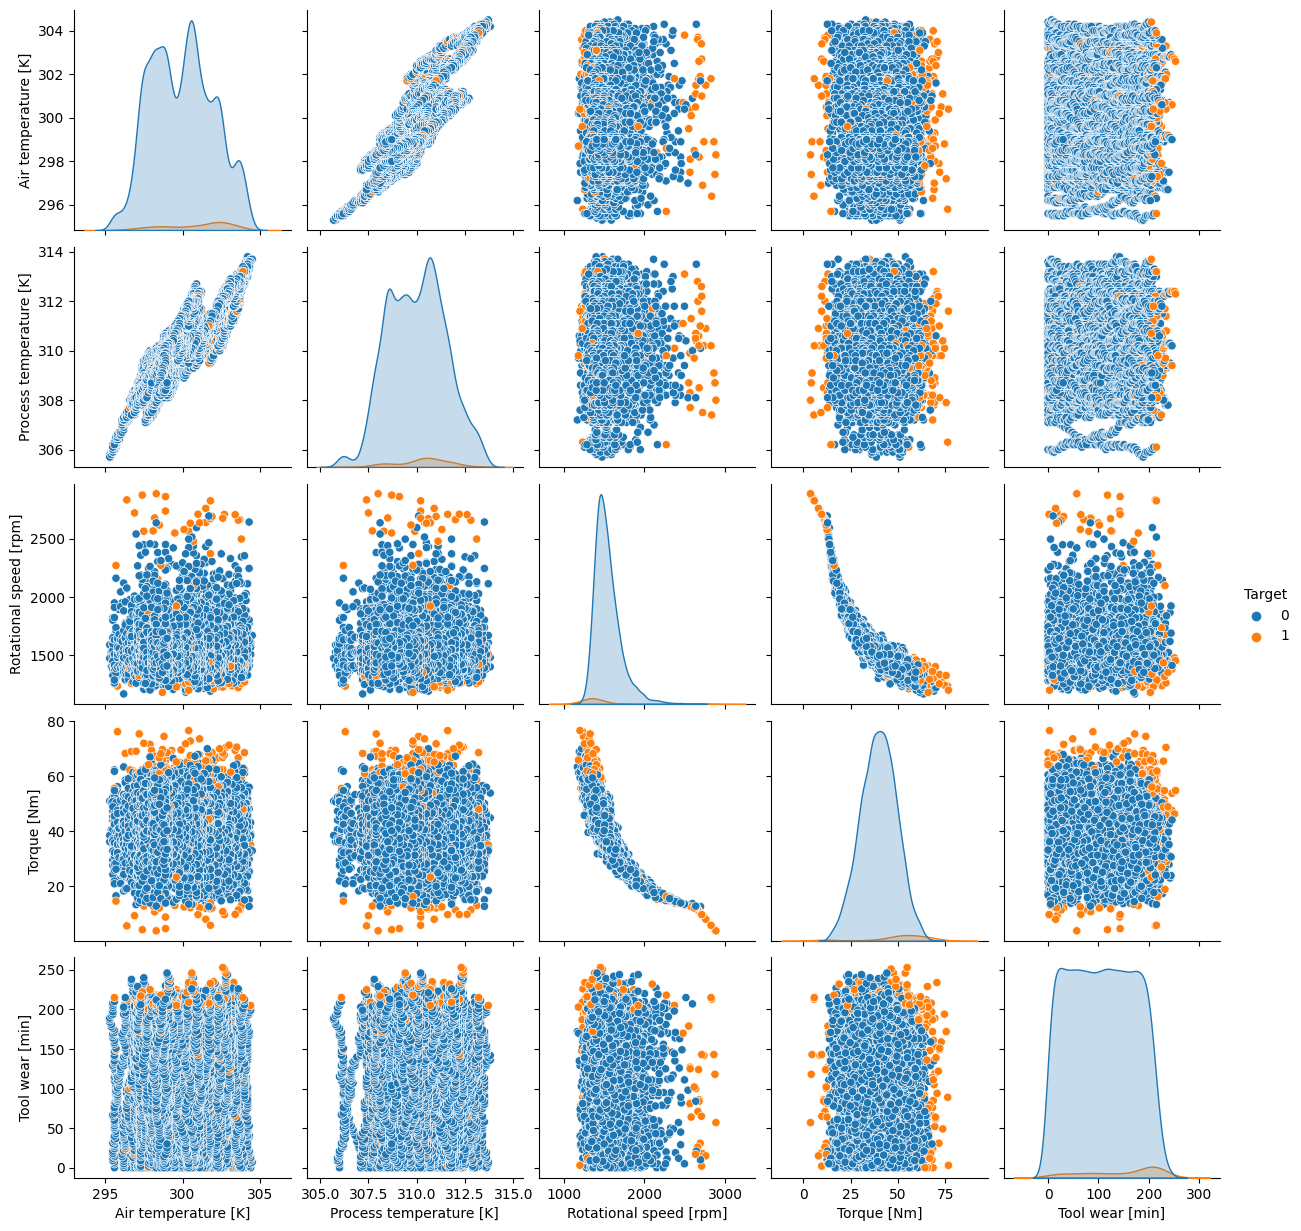

In [36]:
sns.pairplot(df,hue="Target")

In [38]:
# Torque is tendency of a force to turn or twist

In [39]:
# Mathematically Torque and Rotational speed are inversely co-related

In [40]:
# Failure is extreme when torque is high and low rotational speed and viceversa

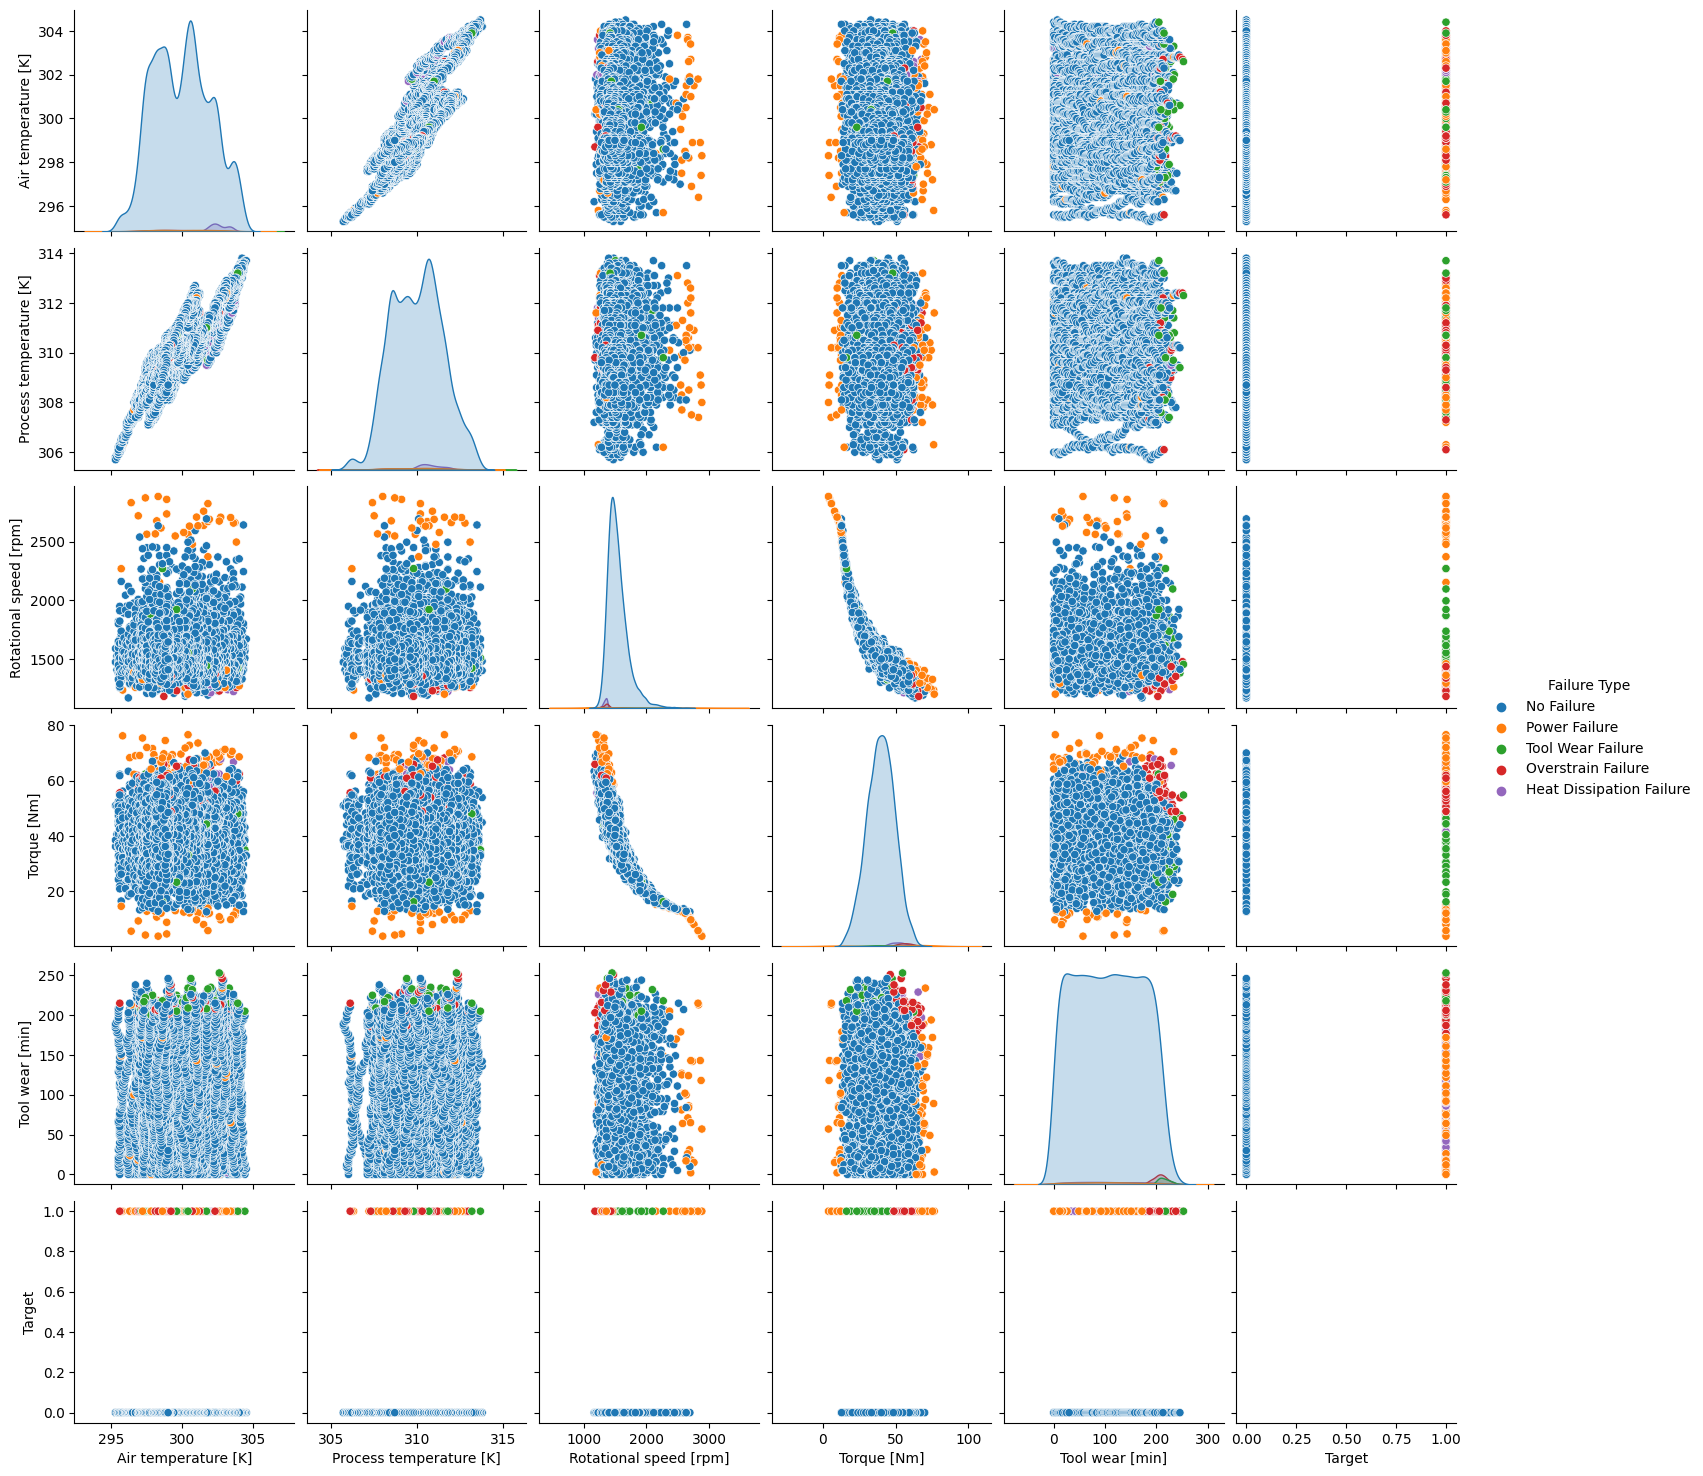

In [41]:
sns.pairplot(df,hue="Failure Type")

In [43]:
df100=df[['Rotational speed [rpm]','Torque [Nm]']]

In [44]:
df100

,Rotational speed [rpm],Torque [Nm]
0,1551,42.8
1,1408,46.3
2,1498,49.4
3,1433,39.5
4,1408,40.0
...,...,...
9995,1604,29.5
9996,1632,31.8
9997,1645,33.4
9998,1408,48.5


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df100, *['Rotational speed [rpm]'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df100, *['Torque [Nm]'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df100, *['Rotational speed [rpm]'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df100, *['Torque [Nm]'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df100, *[[['Rotational speed [rpm]', 'Torque [Nm]']]], **{})
chart

<Axes: xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

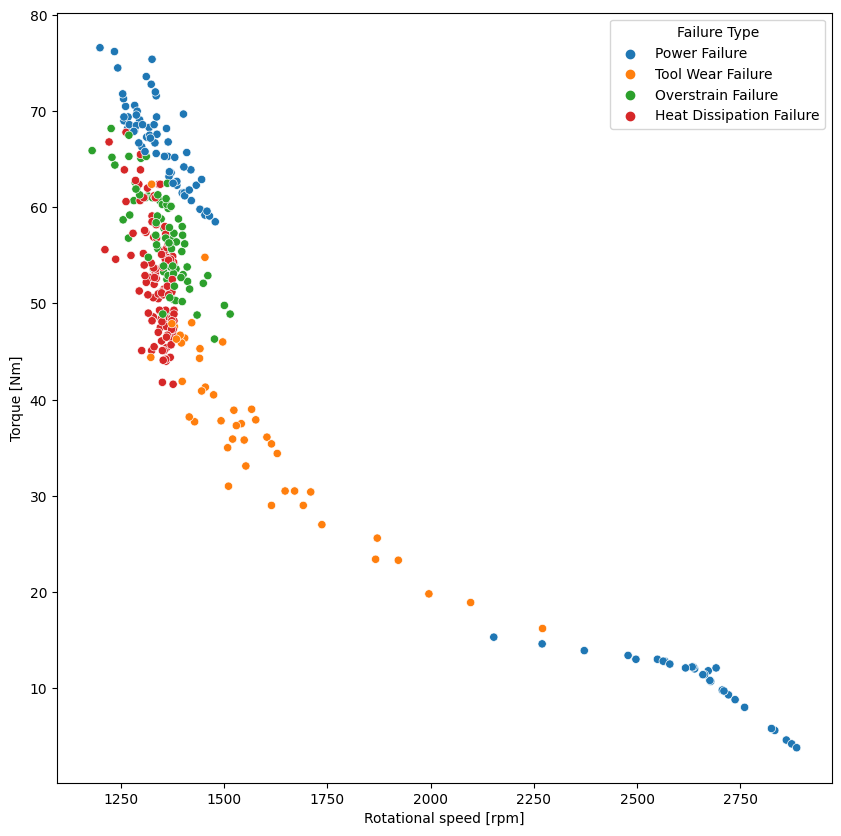

In [48]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df[df['Target']==1],x="Rotational speed [rpm]",y="Torque [Nm]",hue="Failure Type")

In [49]:
# Correlation matrix

<Axes: >

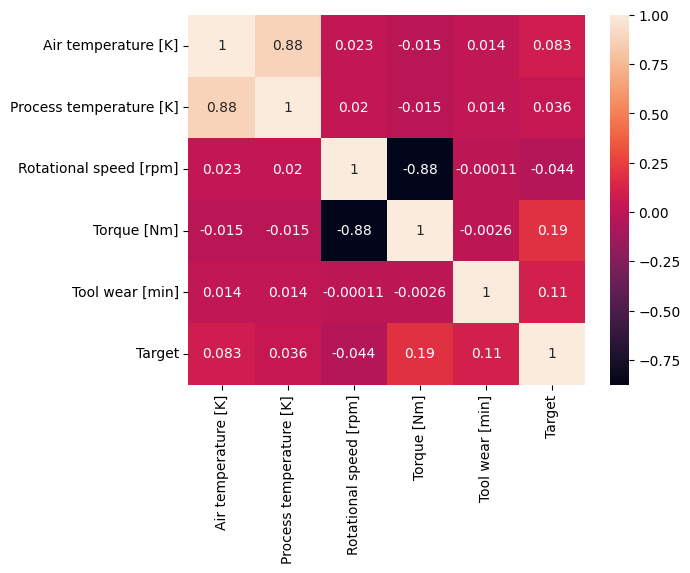

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
df.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

<Axes: xlabel='Type', ylabel='count'>

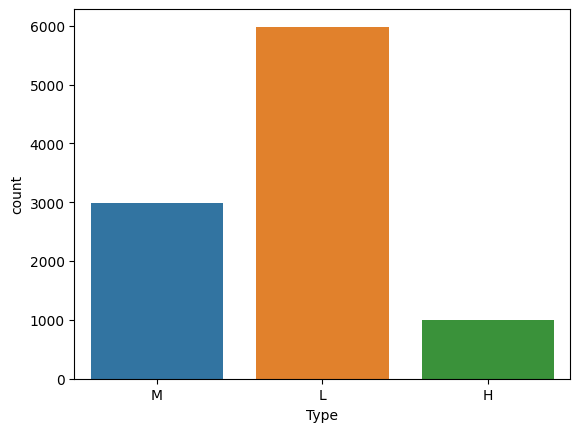

In [52]:
sns.countplot(x=df['Type'])

<Axes: ylabel='Density'>

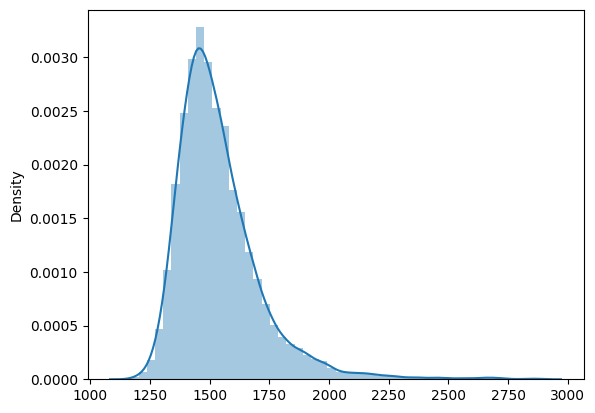

In [53]:
sns.distplot(x=df['Rotational speed [rpm]'])

In [54]:
# Percentage of Failure based on quality of components:L,M,H

In [56]:
low_quality=df[df['Type']=='L']
medium_quality=df[df['Type']=='M']
High_quality=df[df['Type']=='H']

In [60]:
low_quality['Target'].value_counts(normalize=True)*100

0    96.139706
1     3.860294
Name: Target, dtype: float64

In [61]:
medium_quality['Target'].value_counts(normalize=True)*100

0    97.358743
1     2.641257
Name: Target, dtype: float64

In [62]:
High_quality['Target'].value_counts(normalize=True)*100

0    97.995992
1     2.004008
Name: Target, dtype: float64

In [63]:
# although the low price products has failure amount 3.86,medium 2.64 and high_quality 2
# But the difference is not very High

In [64]:
# Finding outliers

<Axes: xlabel='Torque [Nm]'>

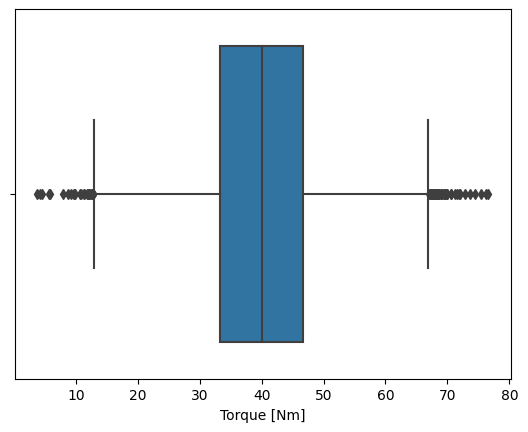

In [67]:
sns.boxplot(data=df,x="Torque [Nm]")

<Axes: xlabel='Rotational speed [rpm]'>

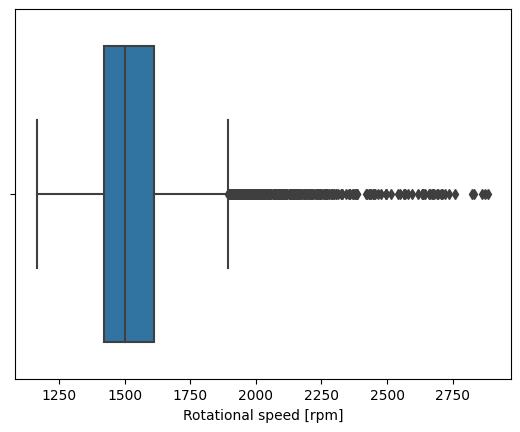

In [68]:
sns.boxplot(data=df,x="Rotational speed [rpm]")

In [69]:
# Label encoding___ordinal data

In [70]:
df["Type"]=df["Type"].map({"L":0,"M":1,"H":2})

In [71]:
df["Type"].value_counts()

0    5984
1    2991
2     998
Name: Type, dtype: int64

In [72]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,No Failure
1,0,298.2,308.7,1408,46.3,3,0,No Failure
2,0,298.1,308.5,1498,49.4,5,0,No Failure
3,0,298.2,308.6,1433,39.5,7,0,No Failure
4,0,298.2,308.7,1408,40.0,9,0,No Failure


In [73]:
df["Failure Type"].value_counts()

No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64

In [74]:
df["Failure Type"]=df["Failure Type"].map({"No Failure":0,"Heat Dissipation Failure":1,"Power Failure":2,"Overstrain Failure":3,"Tool Wear Failure":4})


In [75]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,298.1,308.6,1551,42.8,0,0,0
1,0,298.2,308.7,1408,46.3,3,0,0
2,0,298.1,308.5,1498,49.4,5,0,0
3,0,298.2,308.6,1433,39.5,7,0,0
4,0,298.2,308.7,1408,40.0,9,0,0


In [76]:
# Case1: Target column :Binary classification

In [78]:
x=df.drop(['Target','Failure Type'],axis=1)
y=df[['Target']]

In [79]:
x.shape

(9973, 6)

In [80]:
y.shape

(9973, 1)

In [81]:
# Lets do the scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573


In [86]:
# Train,test split

In [87]:
from sklearn.model_selection import train_test_split


In [88]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,stratify=y,random_state=0)

In [89]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [106]:
rf=RandomForestClassifier()
bg=BaggingClassifier()
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier()
dt=DecisionTreeClassifier()
log=LogisticRegression(class_weight="balanced",multi_class='ovr')

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit,cross_val_score,cross_validate

In [108]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [111]:
for model in[rf,bg,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)
    cv=StratifiedShuffleSplit(n_splits=5,test_size=0.25,random_state=111)
    scoring=["f1_macro","precision_macro","recall_macro"]
    cross_val_scores=cross_validate(model,x_scaled,y,scoring=scoring,cv=cv)
    f1_test_cv=cross_val_scores["test_f1_macro"]
    precision_test_cv=cross_val_scores["test_precision_macro"].mean()
    recall_test_cv=cross_val_scores["test_recall_macro"].mean()

    print("f1 test score",f1_test_cv)
    print("precision test score",precision_test_cv)
    print("recall test score",recall_test_cv)

##############################
performance of  RandomForestClassifier()
##############################
f1 test score [0.85637821 0.86676435 0.85241219 0.87616068 0.85569078]
precision test score 0.9525056951981771
recall test score 0.8026604968192972
##############################
performance of  BaggingClassifier()
##############################
f1 test score [0.88120981 0.87843495 0.87733743 0.90537459 0.87465937]
precision test score 0.9437640531884064
recall test score 0.8384317860408869
##############################
performance of  GradientBoostingClassifier()
##############################
f1 test score [0.86497753 0.85153742 0.86413318 0.87681731 0.867696  ]
precision test score 0.9293254102802839
recall test score 0.8199862077925971
##############################
performance of  AdaBoostClassifier()
##############################
f1 test score [0.78908653 0.77009688 0.79262432 0.76482791 0.7613268 ]
precision test score 0.8294296339002173
recall test score 0.7381454478219805
#

In [114]:
for model in[rf,bg,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)

    abc=model.fit(x_train,y_train)
    y_pred=abc.predict(x_test)
    AC=accuracy_score(y_test,y_pred)
    CR=classification_report(y_test,y_pred)
    CM=confusion_matrix(y_test,y_pred)

    print("classification Report \n",CR)
    print("Accuracy_score \n",AC)
    print("confusion_matrix \n",CM)


##############################
performance of  RandomForestClassifier()
##############################
classification Report 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1929
           1       0.89      0.52      0.65        66

    accuracy                           0.98      1995
   macro avg       0.94      0.76      0.82      1995
weighted avg       0.98      0.98      0.98      1995

Accuracy_score 
 0.9819548872180451
confusion_matrix 
 [[1925    4]
 [  32   34]]
##############################
performance of  BaggingClassifier()
##############################
classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.88      0.65      0.75        66

    accuracy                           0.99      1995
   macro avg       0.93      0.82      0.87      1995
weighted avg       0.98      0.99      0.98      1995

Accuracy_score 

In [115]:
# Do the hyperparameterTuning

In [116]:
# becoz model RF almost giving better results

In [120]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [123]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [124]:
best_param={'n_estimators': np.arange (5,200,5),
            'max_depth': np.arange(5,150,5)}

In [125]:
random_cv=RandomizedSearchCV(rf,best_param,n_iter=10,cv=2)

In [127]:
%%time
random_cv.fit(x_train,y_train)
print("BEST parameters",random_cv.best_params_)

BEST parameters {'n_estimators': 115, 'max_depth': 35}
CPU times: user 13.1 s, sys: 9.23 ms, total: 13.1 s
Wall time: 17.4 s


In [129]:
y_predict=random_cv.predict(x_test)

In [130]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.90      0.56      0.69        66

    accuracy                           0.98      1995
   macro avg       0.94      0.78      0.84      1995
weighted avg       0.98      0.98      0.98      1995



In [131]:
# balancing the dataset approach

In [134]:
from imblearn.over_sampling import RandomOverSampler,SMOTE,BorderlineSMOTE

In [136]:
from imblearn.under_sampling import RandomUnderSampler

In [137]:
smote=SMOTE(random_state=90)
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [138]:
y_train.value_counts()

Target
0         7714
1          264
dtype: int64

In [139]:
y_train_smote.value_counts()

Target
0         7714
1         7714
dtype: int64

In [140]:
rf_smote=rf.fit(x_train_smote,y_train_smote)

In [141]:
y_pred_smote=rf_smote.predict(x_test)

In [142]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1929
           1       0.54      0.79      0.64        66

    accuracy                           0.97      1995
   macro avg       0.77      0.88      0.81      1995
weighted avg       0.98      0.97      0.97      1995



In [143]:
# lets try on tuned model

In [145]:
rf_smote=random_cv.fit(x_train_smote,y_train_smote)

In [146]:
y_pred_smote=rf_smote.predict(x_test)

In [147]:
print(classification_report(y_test,y_pred_smote))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.55      0.77      0.65        66

    accuracy                           0.97      1995
   macro avg       0.77      0.88      0.82      1995
weighted avg       0.98      0.97      0.97      1995



In [148]:
# lets work on the other target variable

In [149]:
x_scaled.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,0.5,0.304348,0.358025,0.222934,0.535714,0.000000
1,0.0,0.315217,0.370370,0.139697,0.583791,0.011858
2,0.0,0.304348,0.345679,0.192084,0.626374,0.019763
3,0.0,0.315217,0.358025,0.154249,0.490385,0.027668
4,0.0,0.315217,0.370370,0.139697,0.497253,0.035573


In [150]:
y=df["Failure Type"]

In [151]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_scaled,y,test_size=0.20,stratify=y,random_state=60)

In [153]:
for model in[rf,bg,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)

    abc=model.fit(x_train1,y_train1)
    y_pred1=abc.predict(x_test1)
    AC=accuracy_score(y_test1,y_pred1)
    CR=classification_report(y_test1,y_pred1)
    CM=confusion_matrix(y_test1,y_pred1)
    print("classification report \n",CR)
    print("Accuracy_score \n",AC)
    print("confusion_matrix \n",CM)

##############################
performance of  RandomForestClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.88      0.68      0.77        22
           2       0.93      0.74      0.82        19
           3       0.82      0.56      0.67        16
           4       0.00      0.00      0.00         9

    accuracy                           0.98      1995
   macro avg       0.72      0.60      0.65      1995
weighted avg       0.98      0.98      0.98      1995

Accuracy_score 
 0.9844611528822055
confusion_matrix 
 [[1926    2    0    1    0]
 [   7   15    0    0    0]
 [   5    0   14    0    0]
 [   6    0    1    9    0]
 [   8    0    0    1    0]]
##############################
performance of  BaggingClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           

In [158]:
smote=SMOTE(random_state=90)
x_train_smote1,y_train_smote1=smote.fit_resample(x_train1,y_train1)

In [159]:
y_train1.value_counts()

0    7714
1      90
2      76
3      62
4      36
Name: Failure Type, dtype: int64

In [160]:
y_train_smote1.value_counts()

0    7714
1    7714
3    7714
2    7714
4    7714
Name: Failure Type, dtype: int64

In [162]:
for model in[rf,bg,gdb,adb,dt,log]:
    print("##########"*3)
    print("performance of ", model)
    print("##########"*3)

    abc=model.fit(x_train_smote1,y_train_smote1)
    y_pred1=abc.predict(x_test1)
    AC=accuracy_score(y_test1,y_pred1)
    CR=classification_report(y_test1,y_pred1)
    CM=confusion_matrix(y_test1,y_pred1)
    print("classification report \n",CR)
    print("Accuracy_score \n",AC)
    print("confusion_matrix \n",CM)

##############################
performance of  RandomForestClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1929
           1       0.85      0.77      0.81        22
           2       0.65      0.68      0.67        19
           3       0.52      0.88      0.65        16
           4       0.05      0.22      0.08         9

    accuracy                           0.96      1995
   macro avg       0.61      0.70      0.64      1995
weighted avg       0.98      0.96      0.97      1995

Accuracy_score 
 0.9588972431077695
confusion_matrix 
 [[1867    3    5   12   42]
 [   4   17    1    0    0]
 [   6    0   13    0    0]
 [   1    0    1   14    0]
 [   6    0    0    1    2]]
##############################
performance of  BaggingClassifier()
##############################
classification report 
               precision    recall  f1-score   support

           